In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
df_motion = pd.read_csv('final_testing_data/ANALOG03.TXT', names=['Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                                              'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                              'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)'])

In [86]:
df_motion.head()

,Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z)
0,2.69,9.31,-0.39,48.63,-21.65,-103.76,-0.07,0.02,-0.03
1,2.56,9.19,-1.42,49.11,-21.09,-103.76,0.02,-0.01,-0.08
2,3.04,8.86,-0.50,49.65,-19.82,-104.02,0.28,0.42,-0.18
3,5.56,8.81,0.71,50.13,-20.64,-112.07,1.66,-0.30,0.16
4,1.82,7.07,5.48,47.88,-17.47,-115.78,0.17,0.10,0.30


In [63]:
df_motion.shape

(755, 9)

In [65]:
time = [i for i in range(755)]

In [67]:
def plot_data(title):   
    plt.figure(figsize=(20,10))
    plt.plot(time, df_motion[title+'(x)'])
    plt.plot(time, df_motion[title+'(y)'])
    plt.plot(time, df_motion[title+'(z)'])

    plt.xlabel('Time')
    plt.ylabel(title)
    plt.title('time vs. '+title)

    plt.legend(['x dim', 'y dim', 'z dim'])

In [52]:
# plot_data('Acceleration')

In [51]:
# plot_data('Magnetometer')

In [50]:
# plot_data('Gyroscope')

In [49]:
import seaborn as sns
sns.set()

In [79]:
df_motion.head()

,Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z),Pressure
0,2.69,9.31,-0.39,48.63,-21.65,-103.76,-0.07,0.02,-0.03,29.257519
1,2.56,9.19,-1.42,49.11,-21.09,-103.76,0.02,-0.01,-0.08,29.543634
2,3.04,8.86,-0.50,49.65,-19.82,-104.02,0.28,0.42,-0.18,29.828062
3,5.56,8.81,0.71,50.13,-20.64,-112.07,1.66,-0.30,0.16,30.110582
4,1.82,7.07,5.48,47.88,-17.47,-115.78,0.17,0.10,0.30,30.390993


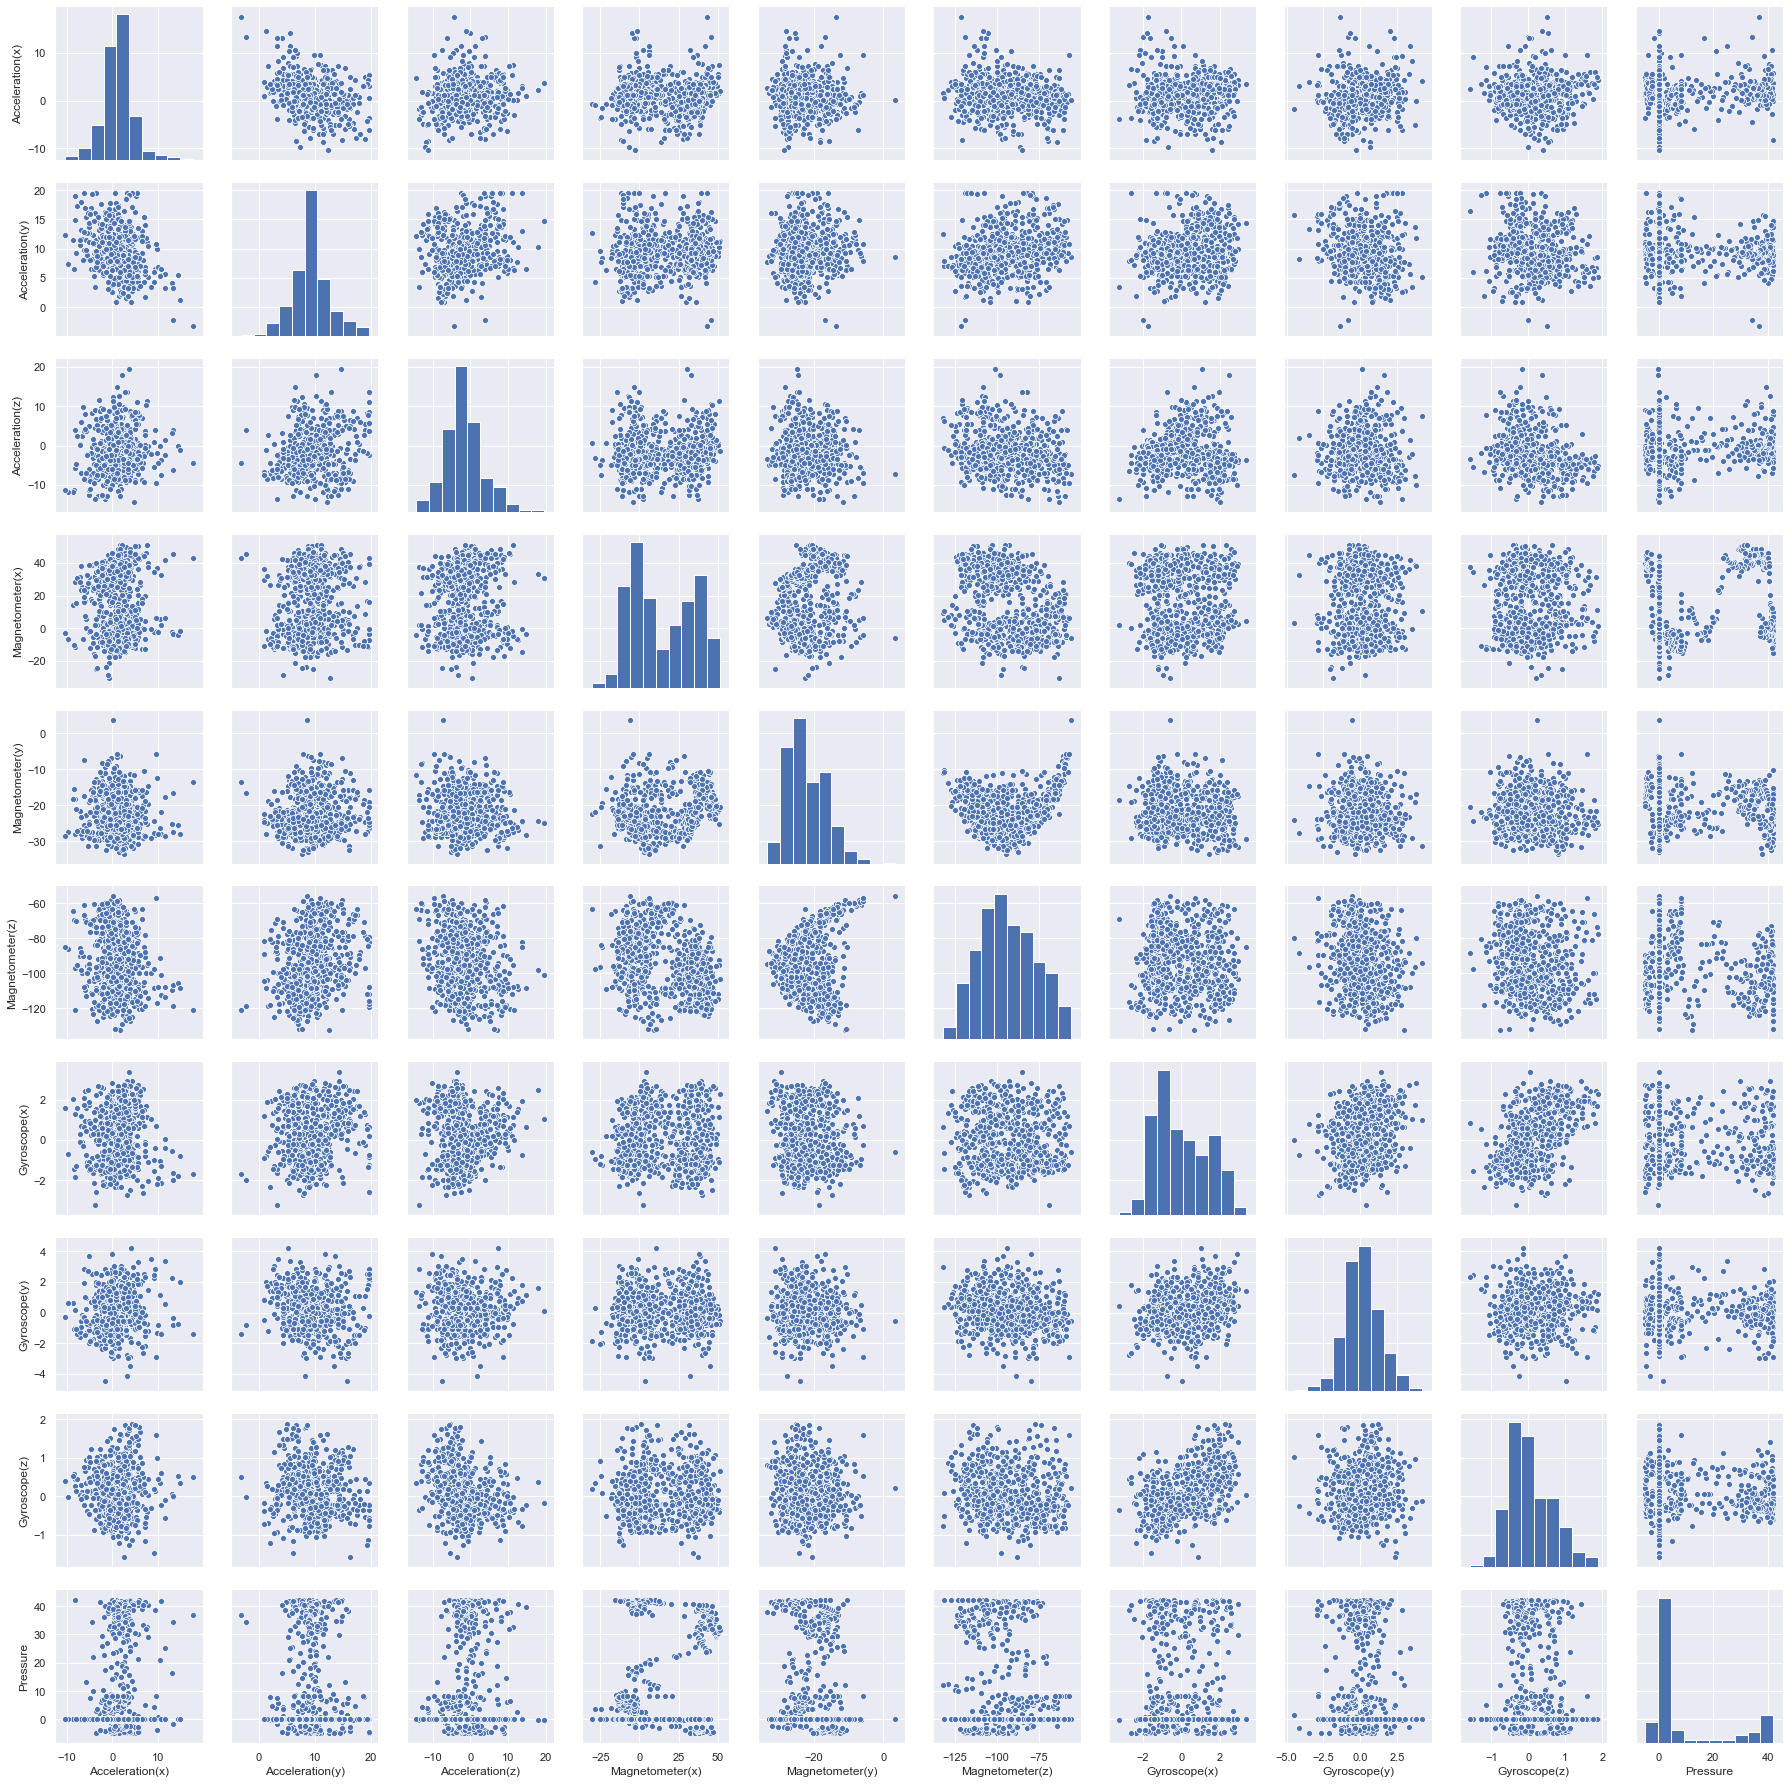

In [87]:
sns.pairplot(df_motion)

In [145]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import random 

## Analysis and Modeling of IMU Sensor Data

In [55]:
josh = pd.read_csv('final_testing_data/Josh_Thigh.TXT', names=['Time(ms)', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                                              'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                              'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)'])
josh.head()

,Time(ms),Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z)
0,706,0.15,8.37,-5.28,28.92,-22.11,-86.14,0.01,0.02,-0.05
1,1130,1.53,9.26,-3.11,30.93,-21.56,-90.92,-0.26,0.12,-0.26
2,1501,0.38,9.20,0.24,30.97,-24.79,-108.02,1.50,1.74,-0.00
3,1939,-3.84,9.94,-2.33,27.97,-23.08,-98.90,-1.17,0.09,-0.23
4,2187,-0.71,9.01,-2.94,29.79,-21.98,-83.21,-2.45,0.09,-0.39


In [56]:
def plot_data(title, times, df):   
    fig, axs = plt.subplots(3, figsize=(15,15))
    fig.suptitle('time vs. '+title)
#     plt.figure(figsize=(20,10))
    axs[0].plot(times, df[title+'(x)'], 'r')
    axs[1].plot(times, df[title+'(y)'], 'b')
    axs[2].plot(times, df[title+'(z)'], 'g')
    
    plt.xlabel('Time')
    plt.ylabel(title)
    plt.legend(['x dim', 'y dim', 'z dim'])

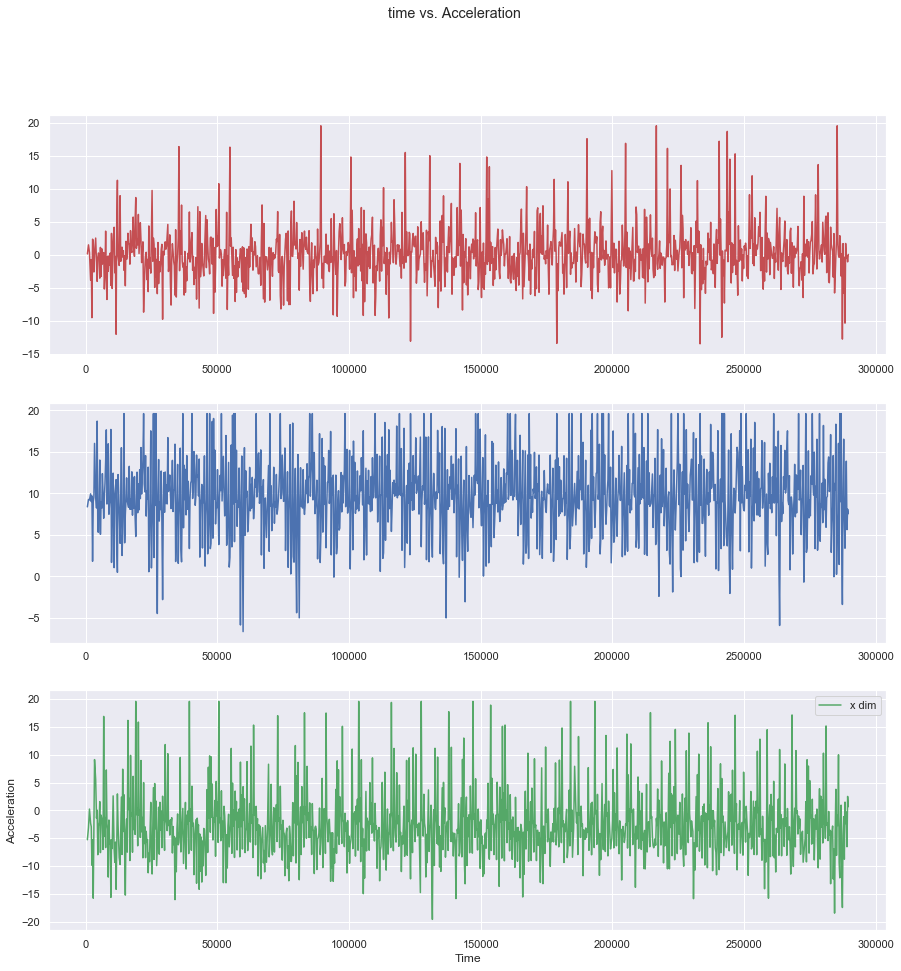

In [57]:
plot_data('Acceleration',josh['Time(ms)'], josh)

In [58]:
bad_walking1 = pd.read_csv('BadWalking1.TXT', names=['Time(ms)', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                                              'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                              'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)'])
bad_walking1.head()

,Time(ms),Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z)
0,1660,-0.07,8.18,-5.59,-10.25,-6.84,-64.50,-0.03,-0.00,-0.06
1,1904,0.15,8.14,-5.69,-9.57,-7.13,-64.22,0.01,0.04,-0.04
2,2150,0.00,8.15,-5.68,-9.60,-7.09,-64.16,-0.00,-0.01,-0.01
3,2396,0.15,8.12,-5.64,-9.65,-6.91,-63.97,-0.00,0.00,-0.03
4,2643,-0.07,8.19,-5.59,-9.94,-6.80,-64.59,0.01,0.03,-0.05


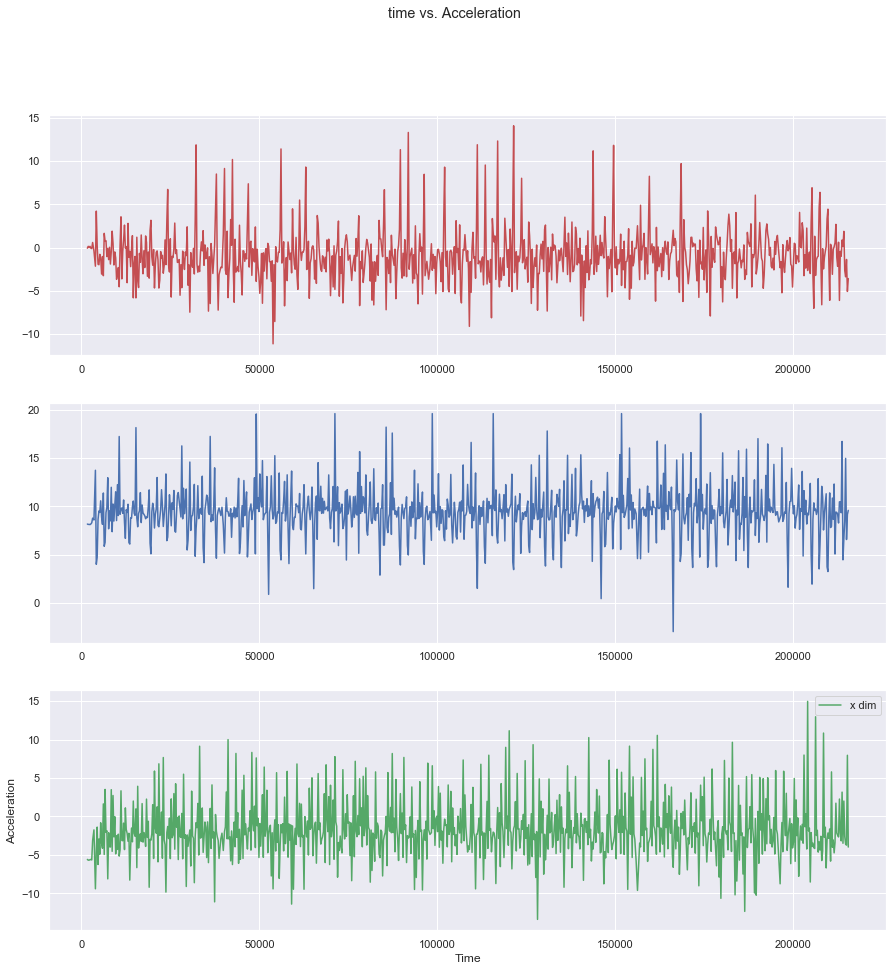

In [59]:
plot_data('Acceleration',bad_walking1['Time(ms)'], bad_walking1)

In [60]:
class1 = [1 for i in range(josh.shape[0])]
josh['Class'] = class1
josh.head()

,Time(ms),Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z),Class
0,706,0.15,8.37,-5.28,28.92,-22.11,-86.14,0.01,0.02,-0.05,1
1,1130,1.53,9.26,-3.11,30.93,-21.56,-90.92,-0.26,0.12,-0.26,1
2,1501,0.38,9.20,0.24,30.97,-24.79,-108.02,1.50,1.74,-0.00,1
3,1939,-3.84,9.94,-2.33,27.97,-23.08,-98.90,-1.17,0.09,-0.23,1
4,2187,-0.71,9.01,-2.94,29.79,-21.98,-83.21,-2.45,0.09,-0.39,1


In [61]:
class2 = [2 for i in range(bad_walking1.shape[0])]
bad_walking1['Class'] = class2
bad_walking1.head()

,Time(ms),Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z),Class
0,1660,-0.07,8.18,-5.59,-10.25,-6.84,-64.50,-0.03,-0.00,-0.06,2
1,1904,0.15,8.14,-5.69,-9.57,-7.13,-64.22,0.01,0.04,-0.04,2
2,2150,0.00,8.15,-5.68,-9.60,-7.09,-64.16,-0.00,-0.01,-0.01,2
3,2396,0.15,8.12,-5.64,-9.65,-6.91,-63.97,-0.00,0.00,-0.03,2
4,2643,-0.07,8.19,-5.59,-9.94,-6.80,-64.59,0.01,0.03,-0.05,2


In [62]:
ml_df = josh.append(bad_walking1)

In [67]:
bad2 = pd.read_csv('final_testing_data/Badwalking2.TXT', names=['Time(ms)', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                                              'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                              'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)'])
cane = pd.read_csv('final_testing_data/BadWalkingWithCane.TXT' , names=['Time(ms)', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                                              'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                              'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)'])
worse = pd.read_csv('final_testing_data/WorstWalk.TXT', names=['Time(ms)', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                                              'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                              'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)'])

In [68]:
class3 = [3 for i in range(bad2.shape[0])]
class4 = [4 for i in range(cane.shape[0])] 
class5 = [5 for i in range(worse.shape[0])]

bad2['Class'] = class3
cane['Class'] = class4
worse['Class'] = class5

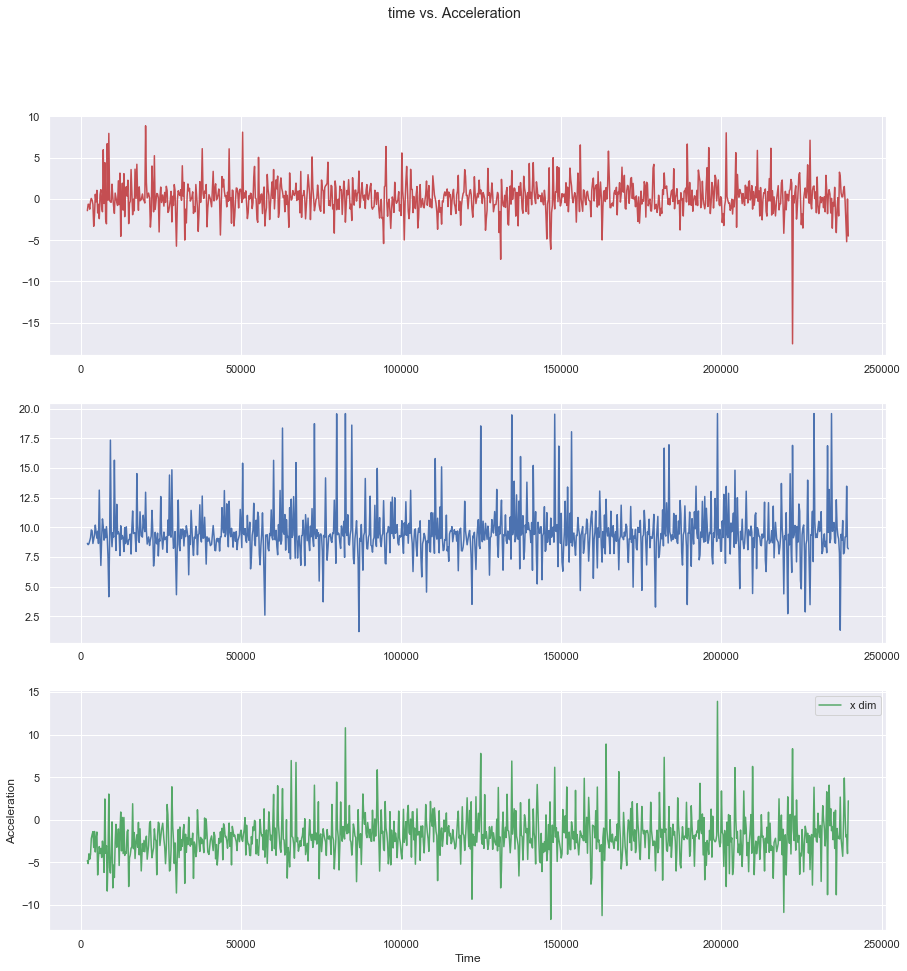

In [69]:
plot_data('Acceleration',bad2['Time(ms)'], bad2)

In [70]:
ml_df = ml_df.append(bad2)
ml_df = ml_df.append(cane)
ml_df = ml_df.append(worse)

In [71]:
ml_df

,Time(ms),Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z),Class
0,706,0.15,8.37,-5.28,28.92,-22.11,-86.14,0.01,0.02,-0.05,1
1,1130,1.53,9.26,-3.11,30.93,-21.56,-90.92,-0.26,0.12,-0.26,1
2,1501,0.38,9.20,0.24,30.97,-24.79,-108.02,1.50,1.74,-0.00,1
3,1939,-3.84,9.94,-2.33,27.97,-23.08,-98.90,-1.17,0.09,-0.23,1
4,2187,-0.71,9.01,-2.94,29.79,-21.98,-83.21,-2.45,0.09,-0.39,1
...,...,...,...,...,...,...,...,...,...,...,...
985,247195,1.09,9.37,1.72,2.15,-28.38,-83.70,-0.43,-0.28,0.32,5
986,247441,1.44,9.31,-1.85,4.18,-22.90,-73.75,-0.77,-0.44,-0.32,5
987,247689,6.31,13.40,-2.11,11.71,-18.39,-67.32,-0.52,-0.89,-0.70,5
988,247934,3.56,8.29,-2.48,18.58,-24.25,-74.16,0.17,0.30,0.23,5


In [44]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import random 
sns.set()

In [88]:
y = ml_df['Class']
X = ml_df.drop(columns=['Class', 'Time(ms)'])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [91]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.7777135658408485

In [92]:
y_pred=clf.predict(X_test)

In [93]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7893820713664056


In [68]:
ml_df.to_csv('MLDataset.csv', index=False)

In [99]:
y_pred2 = clf.predict(df_motion)

In [100]:
from scipy import stats

In [101]:
stats.mode(y_pred2)

ModeResult(mode=array([1]), count=array([329]))

In [102]:
worse_model = worse.drop(columns=['Time(ms)', 'Class'])

In [104]:
w_pred = clf.predict(worse_model)

In [105]:
stats.mode(w_pred)

ModeResult(mode=array([5]), count=array([969]))

In [106]:
dad = pd.read_csv('ExtraDataNotSureIfGood.TXT',  names=['Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                                              'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                              'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)'])
dad.head()

,Acceleration(x),Acceleration(y),Acceleration(z),Magnetometer(x),Magnetometer(y),Magnetometer(z),Gyroscope(x),Gyroscope(y),Gyroscope(z)
0,1.48,9.12,-1.31,56.91,-34.42,-89.54,-0.09,-0.14,0.11
1,2.25,9.20,-1.12,62.73,-33.41,-91.13,-0.09,-0.14,0.11
2,7.76,8.96,-2.13,55.13,-23.27,-85.38,-0.09,-0.14,0.11
3,0.57,10.18,0.05,51.91,-25.59,-93.04,-0.09,-0.14,0.11
4,2.57,9.87,-0.04,53.61,-28.62,-94.12,-0.09,-0.14,0.11


In [108]:
dad_pred = clf.predict(dad)
stats.mode(dad_pred)

ModeResult(mode=array([3]), count=array([158]))

In [118]:
import pickle

In [129]:
filename = 'thigh_model.sav'
pickle.dump(clf2, open(filename, 'wb'))

In [150]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(df_motion)
result = np.asanyarray(result)
mode_info = stats.mode(result)
print(mode_info[0][0])

1


## Shin Data

In [9]:
c1 = pd.read_csv('final_testing_data/Josh_Shin.TXT', names=['Time', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                     'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                           'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)']).drop(columns=['Time'])
c2 = pd.read_csv('final_testing_data/ANALOG04.TXT', names=['Time', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                     'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                           'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)']).drop(columns=['Time'])
c3 = pd.read_csv('final_testing_data/ANALOG05.TXT', names=['Time', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                     'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                           'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)']).drop(columns=['Time'])
c4 = pd.read_csv('final_testing_data/ANALOG06.TXT', names=['Time', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                     'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                           'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)']).drop(columns=['Time'])
c5 = pd.read_csv('final_testing_data/ANALOG07.TXT', names=['Time', 'Acceleration(x)', 'Acceleration(y)', 'Acceleration(z)',
                     'Magnetometer(x)', 'Magnetometer(y)', 'Magnetometer(z)',
                                           'Gyroscope(x)', 'Gyroscope(y)', 'Gyroscope(z)']).drop(columns=['Time'])

In [14]:
clas=[5 for i in range(len(c5))]
c5['Class'] = clas

In [20]:
c1 = c1.append(c5)

In [24]:
y = c1['Class']
X = c1.drop(columns=['Class'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
clf3 = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
clf3.fit(X_train, y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=5)
scores.mean()

0.7716924470371946

In [31]:
y_pred=clf3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8036529680365296


In [34]:
filename = 'shin_model.sav'
pickle.dump(clf3, open(filename, 'wb'))

## Pressure Data

In [109]:
toe = pd.read_csv('ToeWalking.csv', names=['InsideToePressue', 'OutsideToePressue', 'HeelPressure'])

In [110]:
heel = pd.read_csv('HeelWalking.csv', names=['InsideToePressue', 'OutsideToePressue', 'HeelPressure'])

In [111]:
heel.head()

,InsideToePressue,OutsideToePressue,HeelPressure
0,4.60,0.0,7.15
1,4.55,0.0,6.90
2,4.55,0.0,6.90
3,4.49,0.0,7.09
4,4.49,0.0,7.47


In [112]:
toe.head()

,InsideToePressue,OutsideToePressue,HeelPressure
0,6.83,5.05,0.0
1,7.15,5.22,0.0
2,7.47,5.39,0.0
3,7.86,5.63,0.0
4,8.32,5.92,0.0


In [113]:
class1 = [1 for i in range(len(toe))]
class2 = [2 for i in range(len(heel))]
toe['Class'] = class1
heel['Class'] = class2

In [114]:
ml = toe.append(heel)

In [115]:
ml.shape

(3139, 4)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
y = ml['Class']
X = ml.drop(columns=['Class'])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [119]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
preds = model.predict(X_test)
model.score(X_test, y_test)

1.0

In [130]:
filename = 'toe_heel_model.sav'
pickle.dump(model, open(filename, 'wb'))